In [1]:
import os

In [4]:
data_dir = 'C:\\Users\\Aditya Singh\\Downloads\\cell_images\\cell_images'

In [6]:
os.listdir(data_dir)

['test', 'train']

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from matplotlib.image import imread

In [9]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [10]:
test_path

'C:\\Users\\Aditya Singh\\Downloads\\cell_images\\cell_images\\test\\'

In [12]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [14]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [16]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [17]:
para_cell=train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'


In [18]:
para_cell

'C:\\Users\\Aditya Singh\\Downloads\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [19]:
imread(para_cell).shape

(148, 142, 3)

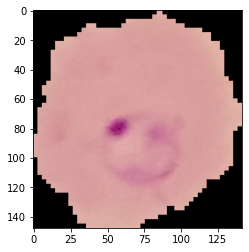

In [20]:
plt.imshow(imread(para_cell))

In [21]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [22]:
uninfected_cell=train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'


In [23]:
uninfected_cell

'C:\\Users\\Aditya Singh\\Downloads\\cell_images\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [24]:
imread(uninfected_cell).shape

(139, 160, 3)

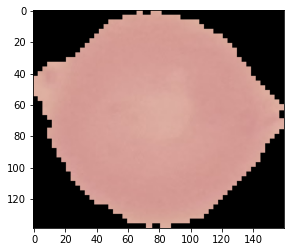

In [25]:
plt.imshow(imread(uninfected_cell))

In [26]:
#pwd

'C:\\Users\\Aditya Singh'

In [27]:
len(os.listdir(train_path+'parasitized'))

12480

In [28]:
len(os.listdir(train_path+'uninfected'))

12480

In [29]:
len(os.listdir(test_path+'parasitized'))

1300

In [30]:
len(os.listdir(test_path+'uninfected'))

1300

In [31]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

C:\Users\Aditya Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


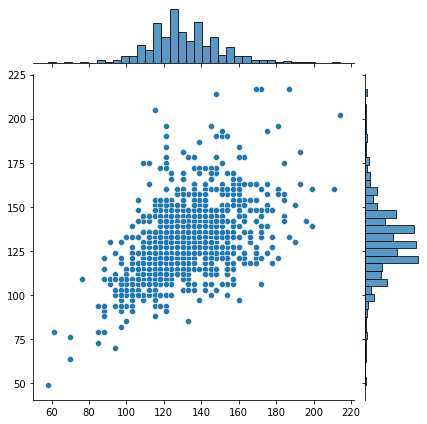

In [33]:
sns.jointplot(dim1,dim2)

In [34]:
np.mean(dim1)

130.92538461538462

In [35]:
np.mean(dim2)

130.75

In [36]:
image_shape = (130,130,3)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

In [46]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

In [40]:
#imread(para_cell).max()

0.9098039

In [44]:
#imread(uninfected_cell).min()

0.0

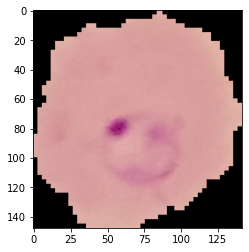

In [51]:
para_img = imread(para_cell)

plt.imshow(para_img)

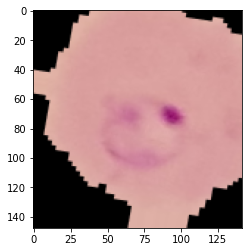

In [53]:
plt.imshow(image_gen.random_transform(para_img))



In [54]:
train_path

'C:\\Users\\Aditya Singh\\Downloads\\cell_images\\cell_images\\train\\'

In [55]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [56]:
#os.listdir(train_path)

['parasitized', 'uninfected']

In [57]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [59]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))



model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))



model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [64]:
batch_size= 16

In [66]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary')

Found 24958 images belonging to 2 classes.


In [67]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [68]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [69]:
results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_14196/4252985099.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])


Epoch 1/20
1560/1560 [==============================] - 577s 369ms/step - loss: 1.0185 - accuracy: 0.5471 - val_loss: 0.6828 - val_accuracy: 0.5527
Epoch 2/20
1560/1560 [==============================] - 400s 256ms/step - loss: 0.6778 - accuracy: 0.5808 - val_loss: 0.6784 - val_accuracy: 0.5677
Epoch 3/20
1560/1560 [==============================] - 468s 300ms/step - loss: 0.6744 - accuracy: 0.5857 - val_loss: 0.6645 - val_accuracy: 0.6031
Epoch 4/20
1560/1560 [==============================] - 505s 324ms/step - loss: 0.6673 - accuracy: 0.6028 - val_loss: 0.6930 - val_accuracy: 0.5246
Epoch 5/20
1560/1560 [==============================] - 498s 319ms/step - loss: 0.6554 - accuracy: 0.6326 - val_loss: 0.3415 - val_accuracy: 0.9196
Epoch 6/20
1560/1560 [==============================] - 474s 304ms/step - loss: 0.2153 - accuracy: 0.9317 - val_loss: 0.1899 - val_accuracy: 0.9400
Epoch 7/20
1560/1560 [==============================] - 461s 295ms/step - loss: 0.1843 - accuracy: 0.9407 - val_

In [70]:
model.history.history

{'loss': [1.018519401550293,
  0.6777868866920471,
  0.674371600151062,
  0.6672568321228027,
  0.6553520560264587,
  0.2152509242296219,
  0.18433716893196106,
  0.17420117557048798,
  0.16769517958164215,
  0.16779914498329163,
  0.17629921436309814],
 'accuracy': [0.5470790863037109,
  0.5807756781578064,
  0.58570396900177,
  0.6027726531028748,
  0.6325827240943909,
  0.931685209274292,
  0.940660297870636,
  0.946710467338562,
  0.9469508528709412,
  0.9467505216598511,
  0.9455485343933105],
 'val_loss': [0.6828466653823853,
  0.6783994436264038,
  0.6645482182502747,
  0.6930090188980103,
  0.34151768684387207,
  0.18985946476459503,
  0.18510597944259644,
  0.17391422390937805,
  0.16912628710269928,
  0.19519521296024323,
  0.18452008068561554],
 'val_accuracy': [0.5526922941207886,
  0.5676922798156738,
  0.6030769348144531,
  0.5246154069900513,
  0.9196153879165649,
  0.9399999976158142,
  0.9399999976158142,
  0.9403846263885498,
  0.9453846216201782,
  0.9353846311569214

In [71]:
model.evaluate_generator(test_image_gen)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_14196/4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.1717185080051422, 0.9457692503929138]

In [72]:
model.metrics_names

['loss', 'accuracy']

In [73]:
pred = model.predict_generator(test_image_gen)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_14196/2032896581.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)


In [83]:
predi = pred > 0.80

In [84]:
predi

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [85]:
len(pred)

2600

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [88]:
print(classification_report(test_image_gen.classes,predi))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1300
           1       0.97      0.86      0.91      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.91      2600
weighted avg       0.92      0.92      0.91      2600



In [89]:
confusion_matrix(test_image_gen.classes,predi)

array([[1261,   39],
       [ 182, 1118]], dtype=int64)

In [90]:
para_cell

'C:\\Users\\Aditya Singh\\Downloads\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [91]:
from tensorflow.keras.preprocessing import image

In [95]:
my_img = image.load_img(para_cell,target_size=image_shape)

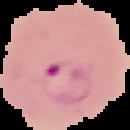

In [96]:
my_img

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [98]:
my_img_arr = image.img_to_array(my_img)

In [99]:
my_img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [100]:
my_img_arr.shape

(130, 130, 3)

In [101]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [102]:
my_img_arr.shape

(1, 130, 130, 3)

In [103]:
model.predict(my_img_arr)

array([[1.3524534e-05]], dtype=float32)

In [104]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}